#### Calculate the daily logarithmic returns using the closing price of stock A and name the column as “Log_returns”.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [96]:
df=pd.read_csv("Stock OHLC dataset.csv")

In [97]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/1/2012,1106.949951,1118.599976,1071.000000,1074.849976,1033.370483,879733
1,6/4/2012,1069.699951,1078.000000,1051.000000,1067.500000,1026.303955,548592
2,6/5/2012,1077.500000,1089.900024,1058.300049,1079.000000,1037.360229,605028
3,6/6/2012,1079.900024,1115.800049,1076.349976,1107.949951,1065.193115,925831
4,6/7/2012,1120.000000,1146.400024,1110.599976,1143.250000,1099.130859,984712


In [98]:
df["Log_returns"] = np.log(df["Adj Close"])/np.log(df["Adj Close"]).shift(1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Log_returns
0,6/1/2012,1106.949951,1118.599976,1071.000000,1074.849976,1033.370483,879733,NaN
1,6/4/2012,1069.699951,1078.000000,1051.000000,1067.500000,1026.303955,548592,0.999011
2,6/5/2012,1077.500000,1089.900024,1058.300049,1079.000000,1037.360229,605028,1.001545
3,6/6/2012,1079.900024,1115.800049,1076.349976,1107.949951,1065.193115,925831,1.003813
4,6/7/2012,1120.000000,1146.400024,1110.599976,1143.250000,1099.130859,984712,1.004499


In [99]:
df["Date"] = pd.to_datetime(df["Date"])
df=df.set_index("Date")

In [100]:
#df.index

#### Create a column called “Cum_returns” and compute cumulative returns in this column.

In [101]:
df["Cum_returns"] = df["Log_returns"].cumsum(axis=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Log_returns,Cum_returns
Date,,,,,,,,
2012-06-01,1106.949951,1118.599976,1071.000000,1074.849976,1033.370483,879733,NaN,NaN
2012-06-04,1069.699951,1078.000000,1051.000000,1067.500000,1026.303955,548592,0.999011,0.999011
2012-06-05,1077.500000,1089.900024,1058.300049,1079.000000,1037.360229,605028,1.001545,2.000557
2012-06-06,1079.900024,1115.800049,1076.349976,1107.949951,1065.193115,925831,1.003813,3.004369
2012-06-07,1120.000000,1146.400024,1110.599976,1143.250000,1099.130859,984712,1.004499,4.008869


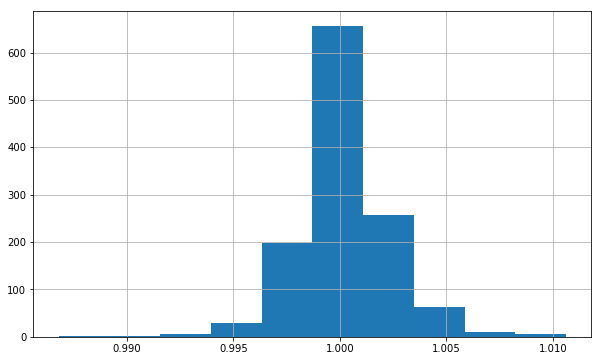

In [102]:
df["Log_returns"].hist(figsize=(10,6));

#### What is the cumulative return value on "1-Sep-2016"?

In [103]:
df.loc["2016-09-01", "Cum_returns"]

1045.2076421177412

In [105]:
df["Simple_Returns"] = df["Adj Close"].pct_change()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Log_returns,Cum_returns,Simple_Returns
Date,,,,,,,,,
2012-06-01,1106.949951,1118.599976,1071.000000,1074.849976,1033.370483,879733,NaN,NaN,NaN
2012-06-04,1069.699951,1078.000000,1051.000000,1067.500000,1026.303955,548592,0.999011,0.999011,-0.006838
2012-06-05,1077.500000,1089.900024,1058.300049,1079.000000,1037.360229,605028,1.001545,2.000557,0.010773
2012-06-06,1079.900024,1115.800049,1076.349976,1107.949951,1065.193115,925831,1.003813,3.004369,0.026830
2012-06-07,1120.000000,1146.400024,1110.599976,1143.250000,1099.130859,984712,1.004499,4.008869,0.031861


In [110]:
sharpe_ratio = df["Simple_Returns"].mean()/df["Simple_Returns"].std()* np.sqrt(252)
sharpe_ratio

1.6010518607316788